# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 names=['age', 'workclass','fnlwgt','education','education-num',
                       'marital_status','occupation','relationship','race','sex','capital_gain',
                       'capital_loss','hrsperweek','native_country','income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrsperweek,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.replace(' ?', np.nan, inplace=True)

df.info()

#workclass, occupation, native_country all have nan's
#education and education-num are the same, so I will drop education

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hrsperweek        32561 non-null int64
native_country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.drop('education', axis=1, inplace=True)

di_wc = {' Private': 0, ' Self-emp-not-inc': 1, ' Self-emp-inc':2, ' Federal-gov':3, ' Local-gov':4,
      ' State-gov':5, ' Without-pay':6, ' Never-worked':7, np.nan:8}

df['workclass'].replace(di_wc, inplace=True)
df['workclass'].unique()

array([5, 1, 0, 3, 4, 8, 2, 6, 7])

In [4]:
di_ms = {' Married-civ-spouse':1, ' Divorced':2, ' Never-married':3, ' Separated':4,
      ' Widowed':5, ' Married-spouse-absent':6, ' Married-AF-spouse':7}

df['marital_status'].replace(di_ms, inplace=True)
df['marital_status'].unique()

array([3, 1, 2, 6, 4, 7, 5])

In [5]:
di_occ = {np.nan:0,' Tech-support':1, ' Craft-repair':2, ' Other-service':3, ' Sales':4,
          ' Exec-managerial':5, ' Prof-specialty':6, ' Handlers-cleaners':7, ' Machine-op-inspct':8,
          ' Adm-clerical':9, ' Farming-fishing':10, ' Transport-moving':11, ' Priv-house-serv':12,
          ' Protective-serv':13, ' Armed-Forces':14}

df['occupation'].replace(di_occ, inplace=True)
df['occupation'].unique()

array([ 9,  5,  7,  6,  3,  4,  2, 11, 10,  8,  1,  0, 13, 14, 12])

In [6]:
di_rel = {' Wife':0, ' Own-child':1, ' Husband':2, ' Not-in-family':3, 
          ' Other-relative':4, ' Unmarried':5}

df['relationship'].replace(di_rel, inplace=True)
df['relationship'].unique()

array([3, 2, 0, 1, 5, 4])

In [7]:
di_rce = {' White':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':0, ' Black':4}

df['race'].replace(di_rce, inplace=True)
df['race'].unique()

array([1, 4, 2, 3, 0])

In [8]:
di_sex = {' Female':0, ' Male':1}

df['sex'].replace(di_sex, inplace=True)
df['sex'].unique()

array([1, 0])

In [9]:
di_nc = {' United-States':0, ' Cambodia':1, ' England':2, ' Puerto-Rico':3, ' Canada':4,
         ' Germany':5, ' Outlying-US(Guam-USVI-etc)':6, ' India':7, ' Japan':8, ' Greece':9,
         ' South':10, ' China':11, ' Cuba':12, ' Iran':13, ' Honduras':14, ' Philippines':15,
         ' Italy':16, ' Poland':17, ' Jamaica':18, ' Vietnam':19, ' Mexico':20, ' Portugal':21,
         ' Ireland':22, ' France':23, ' Dominican-Republic':24, ' Laos':25, ' Ecuador':26,
         ' Taiwan':27, ' Haiti':28, ' Columbia':29, ' Hungary':30, ' Guatemala':31, ' Nicaragua':32,
         ' Scotland':33, ' Thailand':34, ' Yugoslavia':35, ' El-Salvador':36, ' Trinadad&Tobago':37,
         ' Peru':38, ' Hong':39, ' Holand-Netherlands':40, np.nan:41}

df['native_country'].replace(di_nc, inplace=True)
df['native_country'].unique()

array([ 0, 12, 18,  7, 41, 20, 10,  3, 14,  2,  4,  5, 13, 15, 16, 17, 29,
        1, 34, 26, 25, 27, 28, 21, 24, 36, 23, 31, 11,  8, 35, 38,  6, 33,
       37,  9, 32, 19, 39, 22, 30, 40])

In [10]:
di_i = {' >50K':1, ' <=50K':0}

df['income'].replace(di_i, inplace=True)
df['income'].unique()

array([0, 1])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null int64
fnlwgt            32561 non-null int64
education-num     32561 non-null int64
marital_status    32561 non-null int64
occupation        32561 non-null int64
relationship      32561 non-null int64
race              32561 non-null int64
sex               32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hrsperweek        32561 non-null int64
native_country    32561 non-null int64
income            32561 non-null int64
dtypes: int64(14)
memory usage: 3.5 MB


In [12]:
df.describe()

,age,workclass,fnlwgt,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrsperweek,native_country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.146648,1.897784e+05,10.080679,2.077485,5.410614,2.380854,1.330518,0.669205,1077.648844,87.303830,40.437456,2.214490,0.240810
std,13.640433,2.196733,1.055500e+05,2.572720,1.185543,3.178843,1.237468,0.912528,0.470506,7385.292085,402.960219,12.347429,7.647694,0.427581
min,17.000000,0.000000,1.228500e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,1.178270e+05,9.000000,1.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,0.000000,1.783560e+05,10.000000,2.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.370510e+05,12.000000,3.000000,8.000000,3.000000,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,7.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale

X = df.drop('income',axis=1)
y = df['income']

X = minmax_scale(X.values) #scaled X

df_log1 = LogisticRegression().fit(X, y)

print('Accuracy of logistic regression classifier: {:.2f}'.format(df_log1.score(X, y)))

Accuracy of logistic regression classifier: 0.84


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [14]:
coefficients = pd.concat([pd.DataFrame(df.drop('income',axis=1).columns),pd.DataFrame(np.transpose(df_log1.coef_))],axis=1)
print(coefficients)

                 0          0
0              age   2.416259
1        workclass  -0.415939
2           fnlwgt   1.002323
3    education-num   5.234655
4   marital_status  -5.020407
5       occupation  -0.234979
6     relationship  -1.405203
7             race  -0.269409
8              sex   0.464020
9     capital_gain  18.579517
10    capital_loss   2.673049
11      hrsperweek   2.991856
12  native_country  -0.441086


In [15]:
from sklearn.metrics import confusion_matrix

y_pred = df_log1.predict(X)
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

print('According to the above matrix, we have', 23122+1598,'correct predictions and'\
      , 3628+4213, 'incorrect predictions.')


[[23122  1598]
 [ 3628  4213]]
According to the above matrix, we have 24720 correct predictions and 7841 incorrect predictions.


In [16]:
# Let's try this again, but with train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df_log2 = LogisticRegression().fit(X_train, y_train)

print('Accuracy of logistic regression classifier on test data: {:.2f}'.format(df_log2.score(X_test, y_test)))

#The exact same as not splitting the data.

Accuracy of logistic regression classifier on test data: 0.84


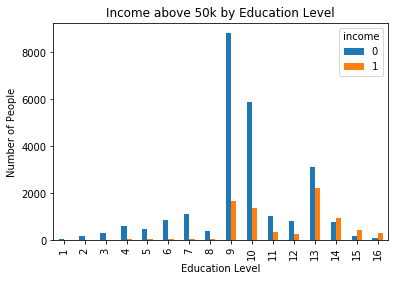

In [23]:
pd.crosstab(df['education-num'], y).plot(kind='bar')
plt.title('Income above 50k by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.show()

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis

### Answers
1. The 3 features that are most positively correlated with income above 50k are: Capital Gain, Education, and Hours per Week.

2. The 3 features that are most negatively correlated with income above 50k are: Marital Status, Relationship, and Native Country.

3. The model used is able to predict at about 84% accuracy, which is pretty good. The coefficients show that Capital Gain has the highest correlation with >50k income, but education and hours worked per week also contribute. In the "Income above 50k by Education Level" graph, you can see that the higher education definitely results in higher income.

#### Other Models Answers
1. Quantile - Using Quantile Regression, we can predict the population for the bottom tier of grades and understand what variables might be contributing to those low grades.

2. Survival - Survival analysis is also referred to as time-to-event analysis. We can use this approach to look at the patterns for each company before they had a new product launch (the event).

3. Ridge Regression - Because we're only looking at small samples of data, ridge regression will fit much better than say, linear regression. Ridge regularizes the coefficients, so even with small samples of data, we can make predictions even if they aren't great. While adding more data (more plants in this case), we'll be able to predict the plant size much more efficiently.